# Exploratory Data Analysis
First load some necessary modules and set the system path.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
os.chdir('/san-data/usecase/magnet_g/misc/PCA_DATA_VIS/Yiming/Summer 2017') 

List the files present in the "Summer 2017" folder.

In [4]:
from subprocess import check_output
print(check_output(["ls", "../Summer 2017"]).decode("utf8"))

Accuracy
final_task.R
iREADY
plot_functions.R
properties_2016.csv
traffic_speed_metrics.R
train_2016_v2.csv
unsupervised.R



## train_2016_v2 Exploration

In [9]:
train_df = pd.read_csv("train_2016_v2.csv", parse_dates = ["transactiondate"])
train_df.shape

(90275, 3)

In [11]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


### logerror

The target variable is **logerror**. Let's see how this varialbe is distributed.

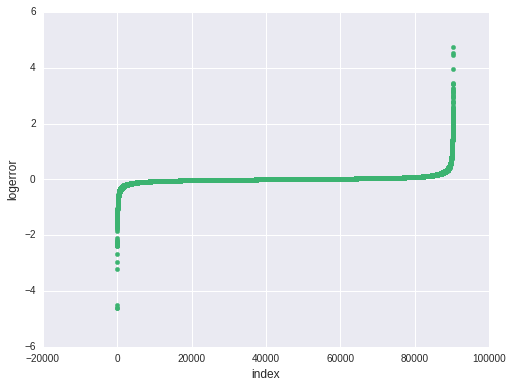

In [14]:
plt.figure(figsize = (8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values), color = "mediumseagreen")
plt.xlabel('index', fontsize = 12)
plt.ylabel('logerror', fontsize = 12)
plt.show()

There are some outliers on both sides. So let's move some outliers out and create a histogram plot.

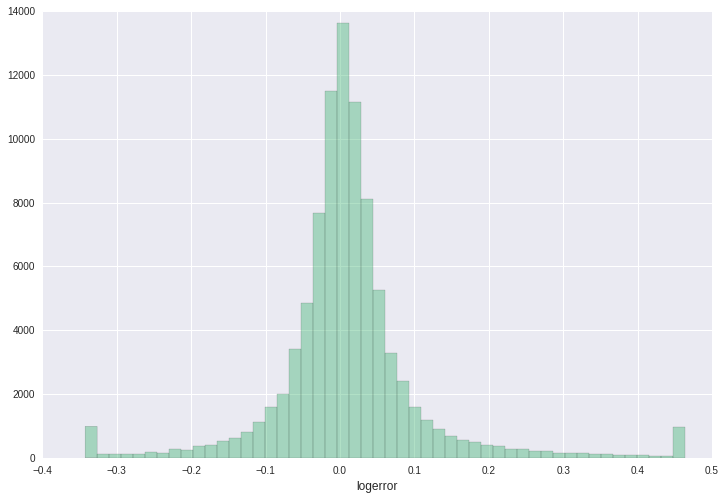

In [15]:
# upper and lower limits
ulimit = np.percentile(train_df.logerror.values, 99) # 99 percentile
llimit = np.percentile(train_df.logerror.values, 1)# 1 percentile
train_df['logerror'].ix[train_df['logerror'] > ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror'] < llimit] = llimit

plt.figure(figsize = (12, 8))
sns.distplot(train_df.logerror.values, bins = 50, kde = False, color = "mediumseagreen")
plt.xlabel('logerror', fontsize = 12)
plt.show()

Now it looks like a perfect normal distribution for **logerror**.

### Transaction Date (transactiondate)
Now go to the date field. First find out the number of transactions in each month.

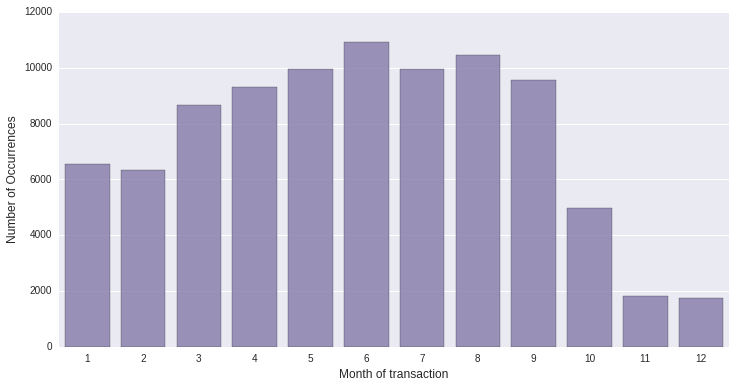

In [23]:
# Convert pandas series to DateTime in a dataframe, here extract month (year / day / ...)
train_df['transaction_month'] = train_df['transactiondate'].dt.month

cnt_srs = train_df['transaction_month'].value_counts()

# Visualization
plt.figure(figsize = (12, 6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha = 0.8, color = color[3])
plt.xlabel('Month of transaction', fontsize = 12)
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.show()

As we could see,the train data has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.

So we have shorter bars in the last three months.

### Parcel ID (parcelid)

In [24]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

So most of the parcel ids are appearing only once in the dataset.

## properties_2016 Exploration

In [27]:
prop_df = pd.read_csv("properties_2016.csv")
prop_df.shape

/opt/anaconda/4.1.1/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [28]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


### Missing Values

There are many missing values in the dataset. So we'll first explore those values.

In [35]:
# missing_df is a dataframe, which contains variables with missing values as well as the counts of NAs
missing_df = prop_df.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by = 'missing_count')

missing_df.tail()

,column_name,missing_count
2,architecturalstyletypeid,2979156
49,fireplaceflag,2980054
46,yardbuildingsqft26,2982570
3,basementsqft,2983589
41,storytypeid,2983593


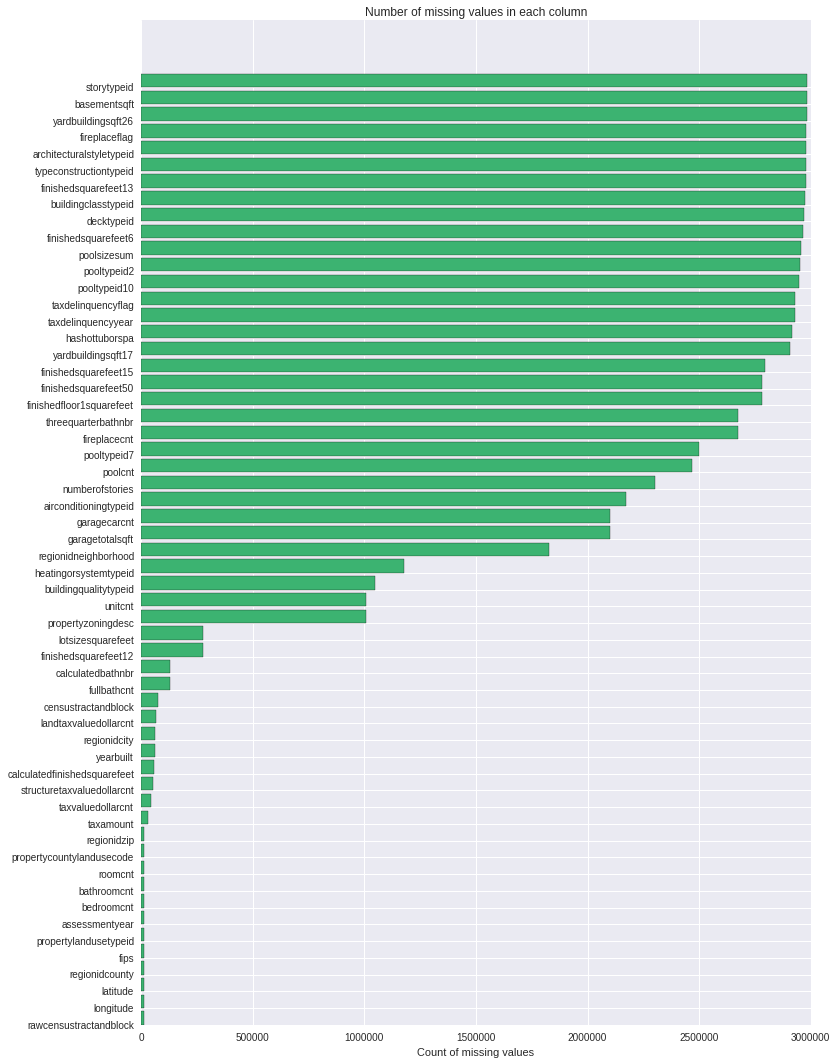

In [36]:
# Visualization
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (12, 18))
rects = ax.barh(ind, missing_df.missing_count.values, color = 'mediumseagreen')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation = 'horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

### Latitude & longitude

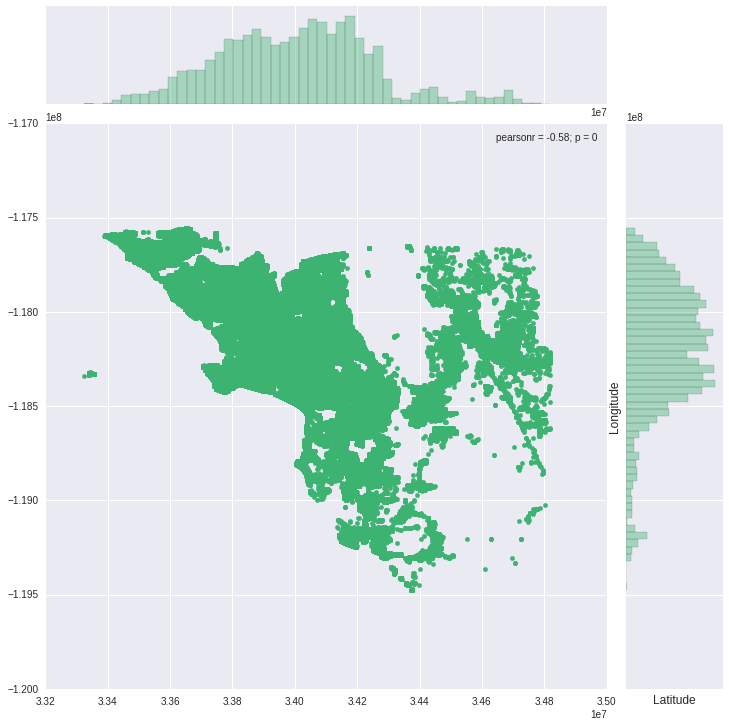

In [38]:
plt.figure(figsize = (12, 12))

# Put two variables on one plot
sns.jointplot(x = prop_df.latitude.values, y = prop_df.longitude.values, size = 10, color = "mediumseagreen")
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()

We are provided with a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.

## Merge train and properties file

We have 90,811 rows in train but about 3,000,000 rows in properties file. So let's merge these two together.

In [39]:
train_df = pd.merge(train_df, prop_df, on = "parcelid", how = "left")
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


Now let's check the dtypes of different types of variables.

In [40]:
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


Most of them are float variables with a few categorical variables. Now let's count.

In [43]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


Now let's check the number of NAs in this new merged dataset, and print out variable names with more than 99.9% NAs.

In [44]:
missing_df = train_df.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.ix[missing_df['missing_ratio'] > 0.999]

,column_name,missing_count,missing_ratio
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
16,finishedsquarefeet13,90242,0.999634
44,storytypeid,90232,0.999524


Four columns have missing values 99.9% of times.

### Univariate Analysis
There are so many variables. We'll first look into float type variables, and then get the correlation with the target variable to see how they are related.

We'll impute the NAs with mean values to compute correlation coefficients.

In [47]:
mean_values = train_df.mean(axis = 0)
train_df_new = train_df.fillna(mean_values, inplace = True)

# correlation coefficient for each of those variables
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype == 'float64']

x_cols contains all "float64" type variable names excluding **logerror**.

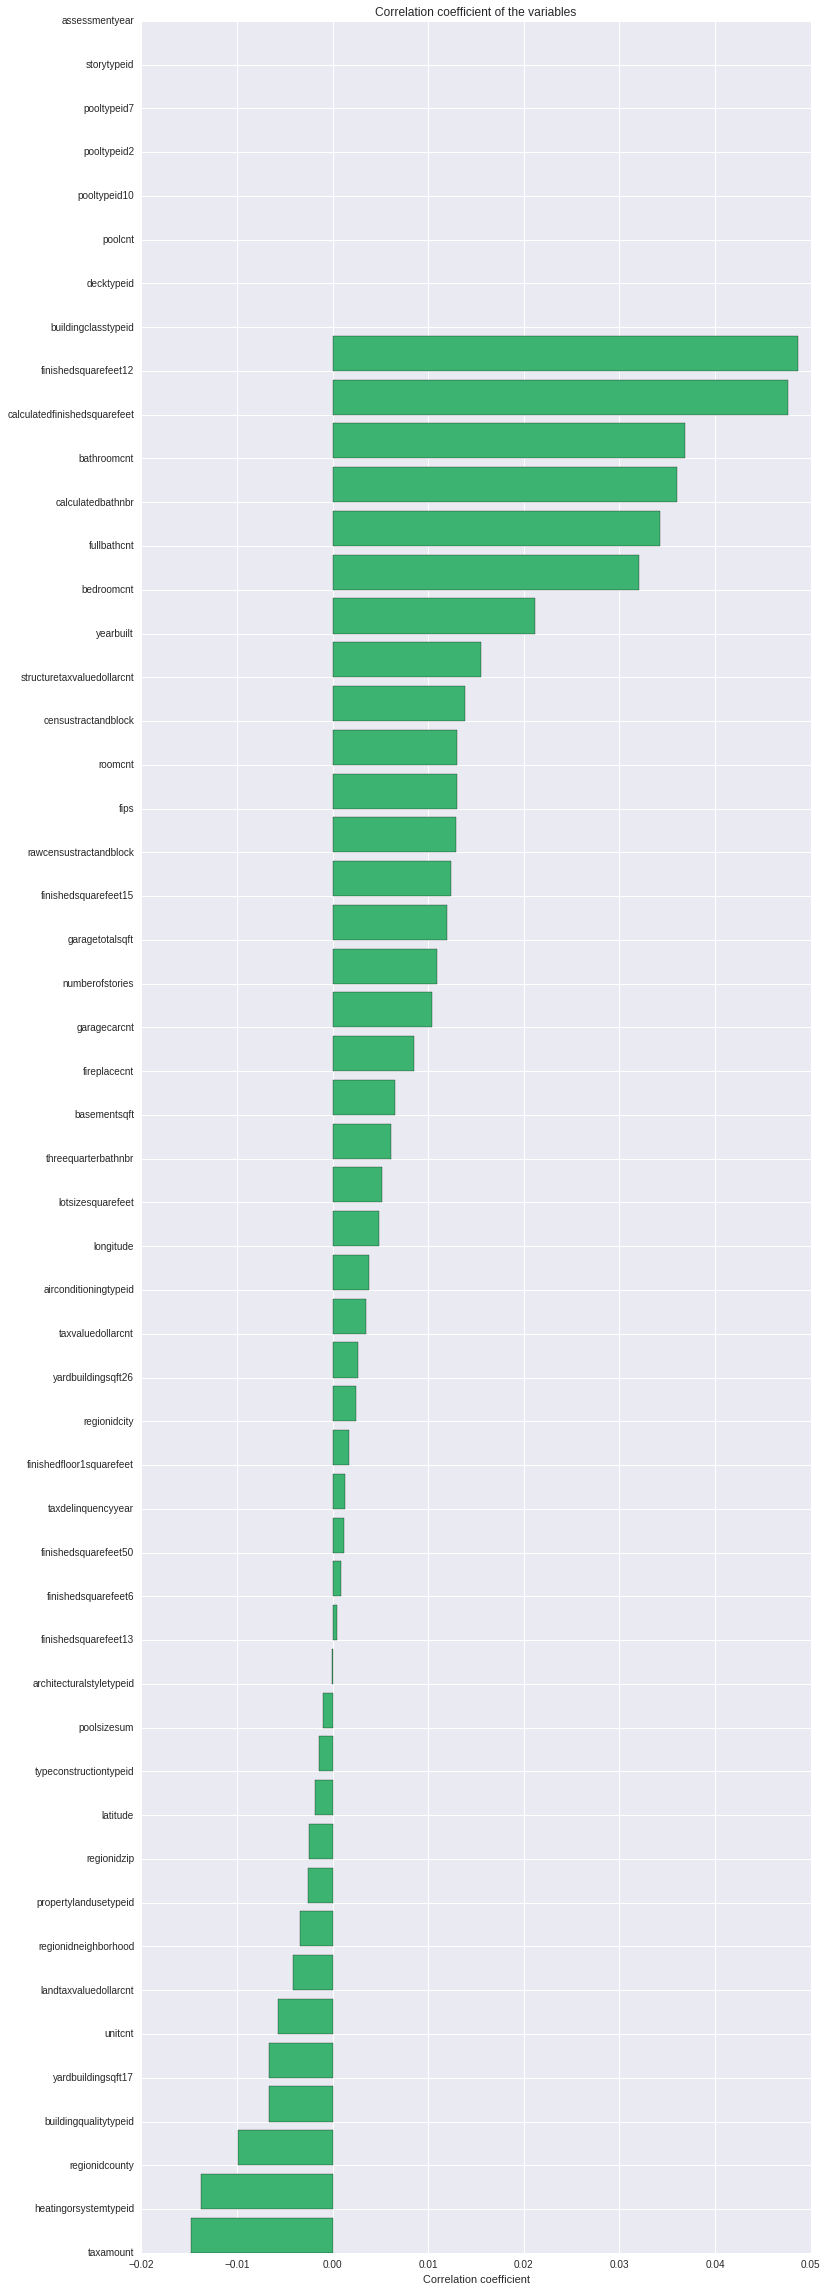

In [49]:
# two empty lists
labels = []
values = []

# compute the correlation coefficient for each variable vs logerror
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0, 1])
    
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by = 'corr_values') # descending order
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize = (12, 40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color = 'mediumseagreen')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

The correlation of the target variable with the given set of variables are low overall.

There are several variables at the top of this graph without any correlation values. Maybe they only have one unique value and hence no correlation value. Let's confirm this fact.

In [50]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

('assessmentyear', 1)
('storytypeid', 1)
('pooltypeid2', 1)
('pooltypeid7', 1)
('pooltypeid10', 1)
('poolcnt', 1)
('decktypeid', 1)
('buildingclasstypeid', 1)


Now let's take the variables with high correlation values (> 0.02 & < -0.01) and do some analysis on them.

In [52]:
corr_df_sel = corr_df.ix[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.032035
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611


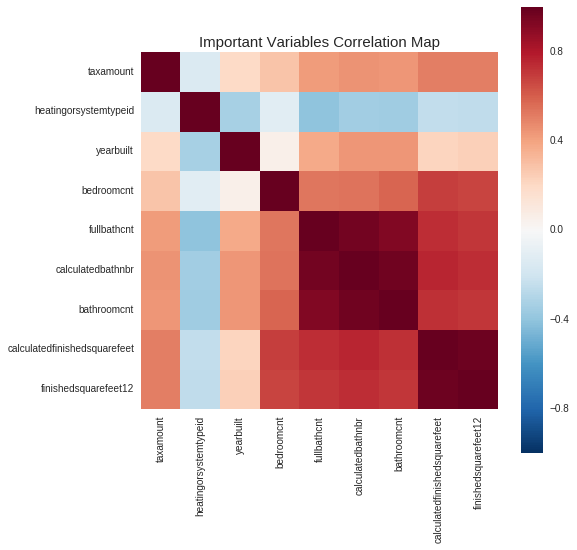

In [53]:
# a list with high correlative variables
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method = "spearman")
fig, ax = plt.subplots(figsize = (8, 8))

# heatmap 
sns.heatmap(corrmat, vmax = 1., square = True)
plt.title("Important Variables Correlation Map", fontsize = 15)
plt.show()

Those important variables are very highly correlated! Now let's look at each of them.

### Finished SquareFeet 12: Finished living area
Let's see how this variable is related with the log error.

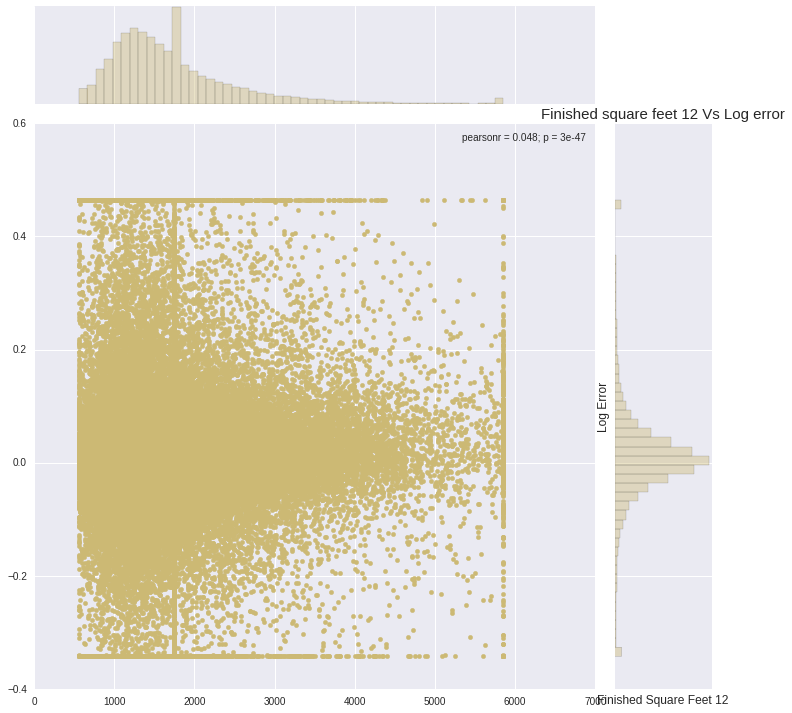

In [54]:
col = "finishedsquarefeet12"
# get rid of outliers
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col] > ulimit] = ulimit
train_df[col].ix[train_df[col] < llimit] = llimit

plt.figure(figsize = (12, 12))
sns.jointplot(x = train_df.finishedsquarefeet12.values, y = train_df.logerror.values, size = 10, color = color[4])
plt.ylabel('Log Error', fontsize = 12)
plt.xlabel('Finished Square Feet 12', fontsize = 12)
plt.title("Finished square feet 12 Vs Log error", fontsize = 15)
plt.show()

It seems that as **finishedsquarefeet12** variable increases, the range of logerror narrows down. Probably larger houses are easier to predict?

### calculatedfinishedsquarefeet :  Calculated total finished living area of the home 
Let's see how this variable is related with the log error.

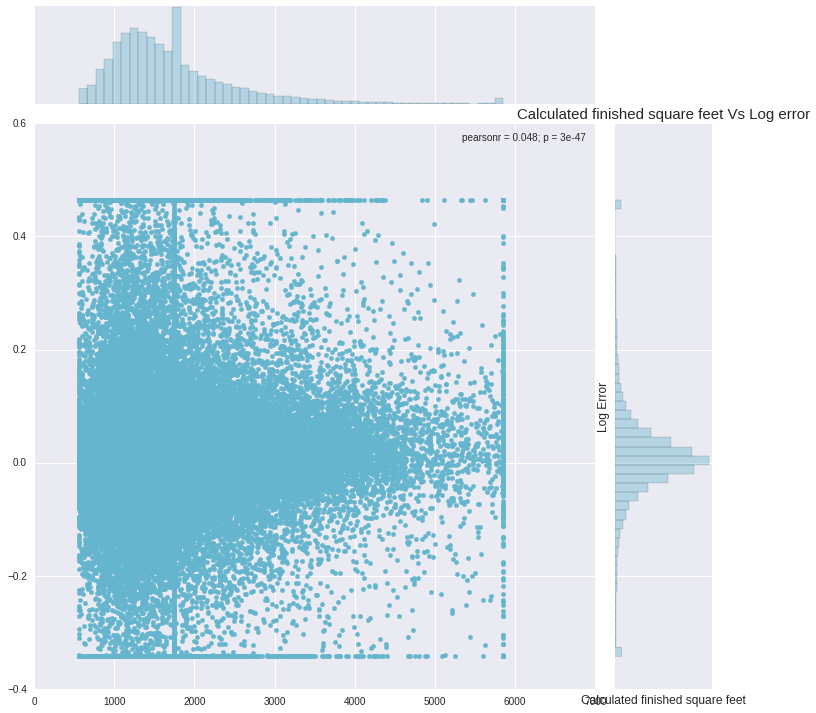

In [55]:
col = "calculatedfinishedsquarefeet"
# get rid of outliers
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col] > ulimit] = ulimit
train_df[col].ix[train_df[col] < llimit] = llimit

plt.figure(figsize = (12, 12))
sns.jointplot(x = train_df.finishedsquarefeet12.values, y = train_df.logerror.values, size = 10, color = color[5])
plt.ylabel('Log Error', fontsize = 12)
plt.xlabel('Calculated finished square feet', fontsize = 12)
plt.title("Calculated finished square feet Vs Log error", fontsize = 15)
plt.show()

This distribution is very similar to the previous one. No wonder the correlation between the two variables are so high.

### bathroomcnt:  Number of bathrooms in home including fractional bathrooms
It is a categorical variable.

**Use *sns.countplot* for visualization.**

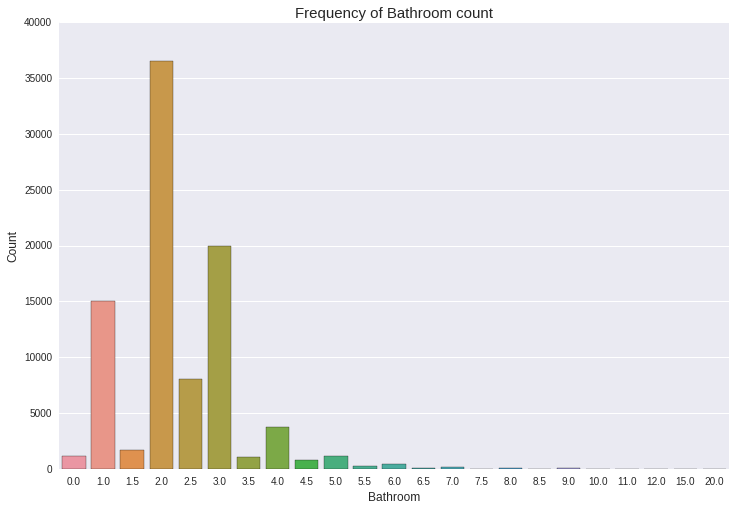

In [56]:
plt.figure(figsize = (12, 8))

sns.countplot(x = "bathroomcnt", data = train_df)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Bathroom', fontsize = 12)
plt.title("Frequency of Bathroom count", fontsize = 15)
plt.show()

Now let's check how the log error changes based on this.

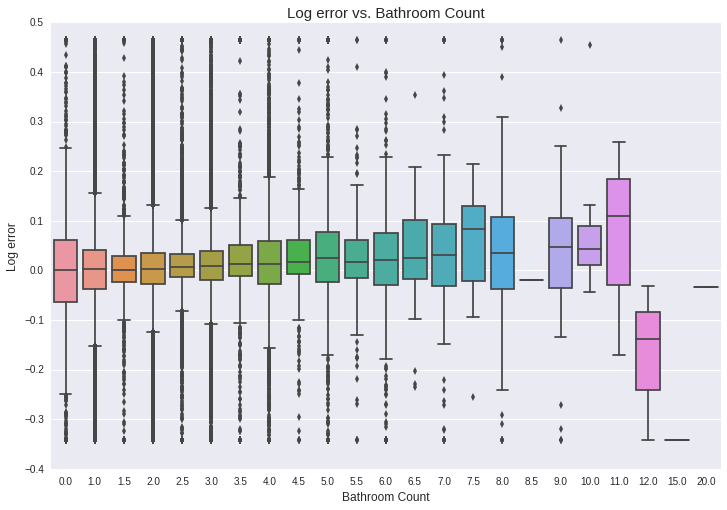

In [57]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "bathroomcnt", y = "logerror", data = train_df)
plt.ylabel('Log error', fontsize = 12)
plt.xlabel('Bathroom Count', fontsize = 12)

plt.title("Log error vs. Bathroom Count", fontsize = 15)
plt.show()

### bedroomcnt:   Number of bedrooms in home 
It is a categorical variable.

**Use *sns.countplot* for visualization.**

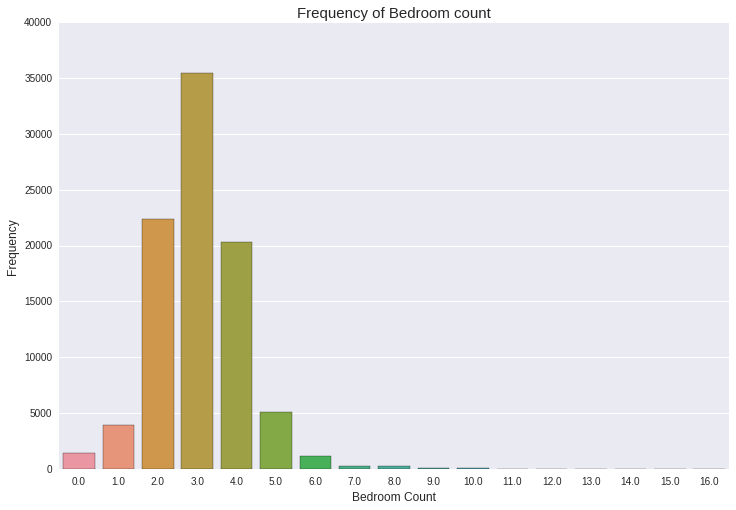

In [58]:
plt.figure(figsize = (12, 8))
sns.countplot(x = "bedroomcnt", data = train_df)
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Bedroom Count', fontsize = 12)
plt.title("Frequency of Bedroom count", fontsize = 15)
plt.show()

Now let's check how the log error changes based on this.

**Use *sns.violinplot* for visualization.**

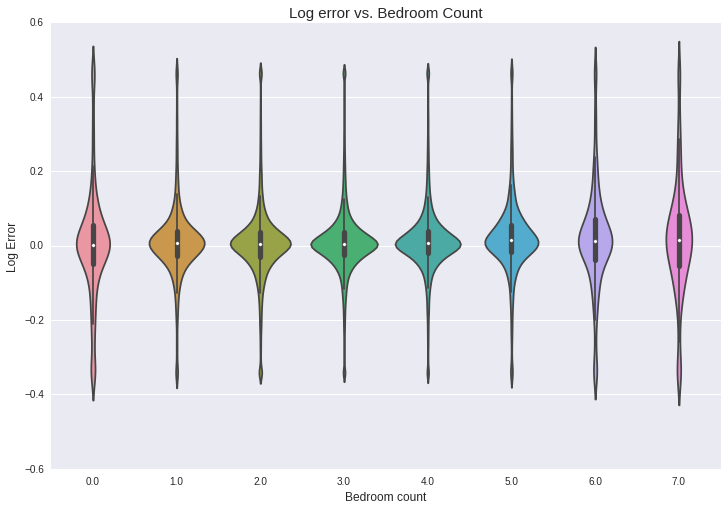

In [59]:
train_df['bedroomcnt'].ix[train_df['bedroomcnt'] > 7] = 7
plt.figure(figsize = (12, 8))
sns.violinplot(x = 'bedroomcnt', y = 'logerror', data = train_df)
plt.xlabel('Bedroom count', fontsize = 12)
plt.ylabel('Log Error', fontsize = 12)
plt.title("Log error vs. Bedroom Count", fontsize = 15)
plt.show()

### taxamount: The total property tax assessed for that assessment year

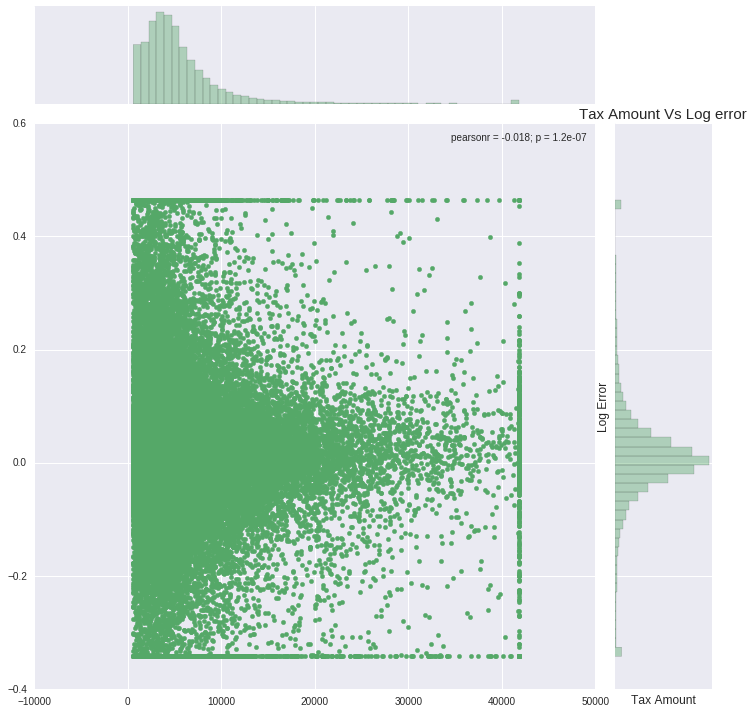

In [60]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col] > ulimit] = ulimit
train_df[col].ix[train_df[col] < llimit] = llimit

plt.figure(figsize = (12, 12))
sns.jointplot(x = train_df['taxamount'].values, y = train_df['logerror'].values, size = 10, color = color[1])
plt.ylabel('Log Error', fontsize = 12)
plt.xlabel('Tax Amount', fontsize = 12)
plt.title("Tax Amount Vs Log error", fontsize = 15)
plt.show()

### YearBuilt:  The Year the principal residence was built 

In [61]:
from ggplot import *
ggplot(aes(x='yearbuilt', y='logerror'), data=train_df) + \
    geom_point(color='steelblue', size=1) + \
    stat_smooth()

ImportError: No module named ggplot

## Extra Trees Model

Now let's build a non-linear model to get the important variables by building Extra Trees model.

In [62]:
train_y = train_df['logerror'].values # target variable
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"] # categorical variables

# training set with features (no target variable)
train_df = train_df.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month'] + cat_cols, axis = 1)
feat_names = train_df.columns.values

In [63]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators = 25, max_depth = 30, max_features = 0.3, n_jobs = -1, random_state = 0)
model.fit(train_df, train_y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=30,
          max_features=0.3, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

**np.argsort**: Returns the indices that would sort an array.

Example: 

> x = np.array([3, 1, 2])

> np.argsort(x)

> array([1, 2, 0])

**np.argsort(importances)[::-1]**: Reverse the order of all elements

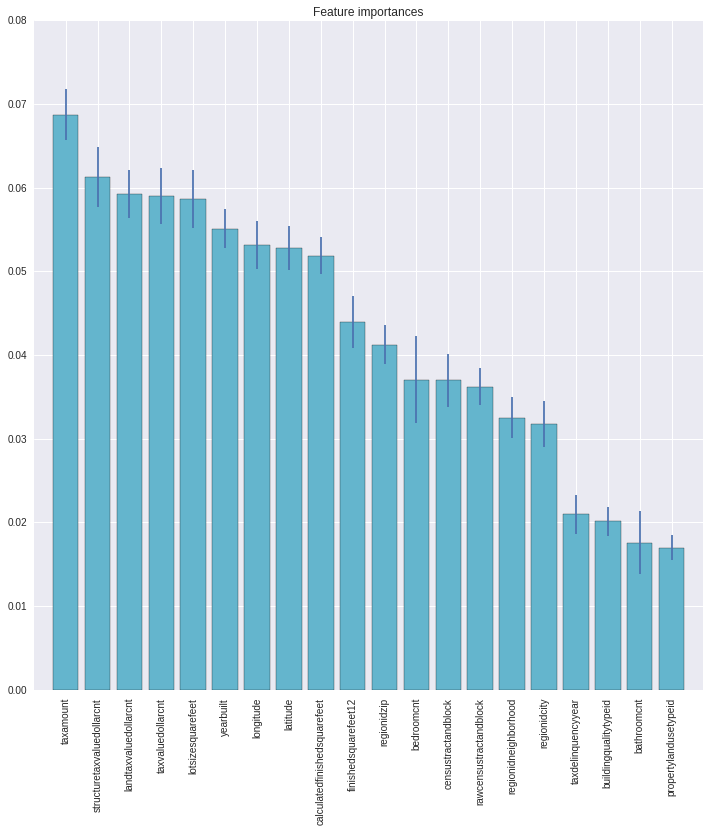

In [70]:
# Plot feature importances
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)
indices = np.argsort(importances)[::-1][: 20]

plt.figure(figsize = (12, 12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color = color[5], yerr = std[indices], align = "center")
plt.xticks(range(len(indices)), feat_names[indices], rotation = 'vertical')
plt.xlim([-1, len(indices)])
plt.show()

It seems that "tax amount" is the most important variable followed by "structure tax value dollar count" and "land tax value dollar count".

## xgb Model

In [74]:
import xgboost as xgb

xgb_params = {
    'eta': 0.05, 
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed': 0
}

dtrain = xgb.DMatrix(train_df, train_y, feature_names = train_df.columns.values)
model = xgb.train(dict(xgb_params, silent = 0), dtrain, num_boost_round = 50)

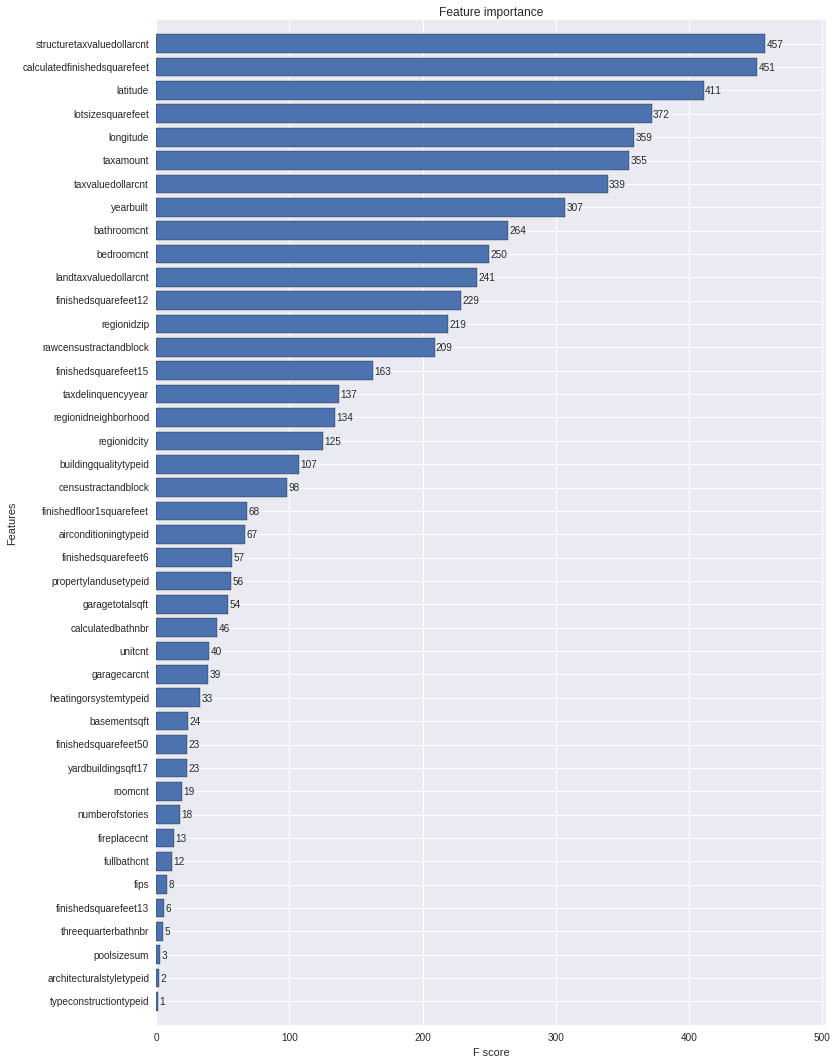

In [77]:
# Feature Importance Plot
fig, ax = plt.subplots(figsize = (12, 18))
xgb.plot_importance(model, height = 0.8, ax = ax)
plt.show()

Using XGBoost, the most important variables are "structured tax value dollar count" followed by "latitude" and "calculated finished square feet".